In [1]:
import numpy as np
import math
from scipy.optimize import linear_sum_assignment
from scipy.optimize import minimize_scalar
from sklearn.utils import check_array
from sklearn.utils import column_or_1d
from skp import SinkhornKnopp  # .
from joblib import Parallel, delayed

In [2]:
from par_gmp import GraphMatch

In [3]:
from graspy.plot import heatmap
from graspy.simulations import er_corr, sbm, sbm_corr
import random
import time
import datetime as dt
from graspy.match import GraphMatch as GMP

In [4]:
np.random.seed(8888)
directed = False
loops = False
n_per_block = 50
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.5
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

In [5]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [5]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 50  # parameter for GMP
start = dt.datetime.now()

sgm = GMP(n_init=n_init, init_method="rand")
sgm = sgm.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
match_ratio = 1 - (
    np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts
)
print(f"{dt.datetime.now() - start} elapsed for serial")

0:00:20.767617 elapsed for serial


In [6]:
print("Match Ratio (serial) ", match_ratio)
print("Optimal objective (serial) ", sgm.score_)

Match Ratio (serial)  0.033333333333333326
Optimal objective (serial)  6496.0


In [7]:
# run GMP in parallel
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 50
start = dt.datetime.now()
np.random.seed(12345)
sgm_par = GraphMatch(n_init=n_init, init_method="rand")
sgm_par = sgm_par.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

print(f"{dt.datetime.now() - start} elapsed for parallel")

0:00:12.595636 elapsed for parallel


In [8]:
print("Match Ratio (parallel) ", match_ratio)
print("Optimal objective (parallel) ", sgm_par.score_)

Match Ratio (parallel)  0.00666666666666671
Optimal objective (parallel)  6092.0


In [52]:
# run GMP in serial
n_init = 120  # parameter for GMP
start = dt.datetime.now()

sgm = GMP(n_init=n_init, init_method="rand")
sgm = sgm.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

print(f"{dt.datetime.now() - start} elapsed for serial")

0:01:07.374317 elapsed for serial


In [12]:
print("Match Ratio (serial) ", match_ratio)
print("Optimal objective (serial) ", sgm.score_)

Match Ratio (serial)  0.013333333333333308
Optimal objective (serial)  6522.0


In [9]:
# run GMP in parallel
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 120
start = dt.datetime.now()
np.random.seed(12345)
sgm_par = GraphMatch(n_init=n_init, init_method="rand")
sgm_par = sgm_par.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

print(f"{dt.datetime.now() - start} elapsed for parallel")

0:00:32.464936 elapsed for parallel


In [10]:
print("Match Ratio (parallel) ", match_ratio)
print("Optimal objective (parallel) ", sgm_par.score_)

Match Ratio (parallel)  0.00666666666666671
Optimal objective (parallel)  6210.0


In [13]:
# run GMP in serial
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 200  # parameter for GMP
start = dt.datetime.now()

sgm = GMP(n_init=n_init, init_method="rand")
sgm = sgm.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
match_ratio = 1 - (
    np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts
)
print(f"{dt.datetime.now() - start} elapsed for serial")

0:01:30.373268 elapsed for serial


In [14]:
print("Match Ratio (serial) ", match_ratio)
print("Optimal objective (serial) ", sgm.score_)

Match Ratio (serial)  0.013333333333333308
Optimal objective (serial)  6576.0


In [11]:
# run GMP in parallel
A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
# shuffle for testing
node_shuffle_input = np.random.permutation(n_verts)
A2_shuffle = A2[np.ix_(node_shuffle_input, node_shuffle_input)]
node_unshuffle_input = np.array(range(n_verts))
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 200
start = dt.datetime.now()
np.random.seed(12345)
sgm_par = GraphMatch(n_init=n_init, init_method="rand")
sgm_par = sgm_par.fit(A1, A2_shuffle)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

print(f"{dt.datetime.now() - start} elapsed for parallel")

0:01:01.846923 elapsed for parallel


In [12]:
print("Match Ratio (parallel) ", match_ratio)
print("Optimal objective (parallel) ", sgm_par.score_)

Match Ratio (parallel)  0.00666666666666671
Optimal objective (parallel)  6154.0


### With seeds

In [6]:
from par_gmp import GraphMatch

In [9]:
W1 = np.sort(random.sample(list(range(n_verts)),10))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])

n_init = 20
start = dt.datetime.now()
np.random.seed(12345) 
sgm = GMP()
sgm = sgm.fit(A1,A2_shuffle,W1,W2)
A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

print(f"{dt.datetime.now() - start} elapsed for serial")
print("Match Ratio (serial) ", match_ratio)
print("Optimal objective (serial) ", sgm.score_)

0:00:00.082765 elapsed for serial
Match Ratio (serial)  1.0
Optimal objective (serial)  7862.0


In [6]:
W1 = np.sort(random.sample(list(range(n_verts)),10))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

n_init = 20
start = dt.datetime.now()
np.random.seed(12345) 
sgm_par = GraphMatch(n_init=n_init, init_method="rand")
sgm_par = sgm_par.fit(A1,A2_shuffle,W1,W2)

A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)


print(f"{dt.datetime.now() - start} elapsed for parallel")
print("Match Ratio (parallel) ", match_ratio)
print("Optimal objective (parallel) ", sgm_par.score_)

0:00:03.384428 elapsed for parallel
Match Ratio (parallel)  1.0
Optimal objective (parallel)  7862.0


### Running time lines

In [7]:
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
store_t=[]
store_m=[]
for i in range(20,210,20):
    currtime = time.time()
    n_init = i  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle)
    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    store_t.append(t)
    store_m.append(match_ratio)
    print("time for n_init =%d is %0.4f, match ratio is %0.4f" % (i, t, match_ratio))

time for n_init =20 is 8.3194, match ratio is 0.0133
time for n_init =40 is 17.6089, match ratio is 0.0133
time for n_init =60 is 25.5366, match ratio is 0.0267
time for n_init =80 is 34.8903, match ratio is 0.0000
time for n_init =100 is 46.3501, match ratio is 0.0133
time for n_init =120 is 51.8681, match ratio is 0.0200
time for n_init =140 is 59.9655, match ratio is 0.0200
time for n_init =160 is 67.8836, match ratio is 0.0000
time for n_init =180 is 77.0491, match ratio is 0.0133
time for n_init =200 is 84.8918, match ratio is 0.1067


In [12]:
print(store_t)
print(store_m)

[8.319382905960083, 17.608941793441772, 25.536614894866943, 34.89030313491821, 46.350131034851074, 51.868088722229004, 59.96548414230347, 67.8835859298706, 77.04912209510803, 84.89184927940369]
[0.013333333333333308, 0.013333333333333308, 0.026666666666666616, 0.0, 0.013333333333333308, 0.020000000000000018, 0.020000000000000018, 0.0, 0.013333333333333308, 0.10666666666666669]


Text(0.5, 1.0, 'running time of serial GM for different initializations')

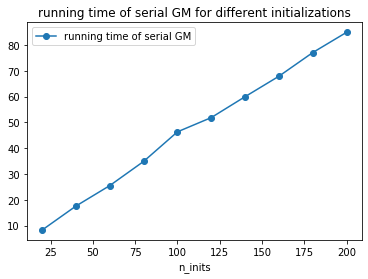

In [13]:
x=np.linspace(20,200,10)
plt.plot(x,store_t,'o-')
#plt.plot(x,store_m,'o-')
plt.xlabel('n_inits')
plt.legend(['running time of serial GM'])
plt.title('running time of serial GM for different initializations')

In [49]:
store_t_par=[]
store_m_par=[]
for i in range(20,210,20):
    currtime = time.time()
    n_init = i  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    store_t_par.append(t)
    store_m_par.append(match_ratio)
    print("time for n_init =%d is %0.4f, match ratio is %0.4f" % (i, t, match_ratio))

time for n_init =20 is 5.4496, match ratio is 0.0133
time for n_init =40 is 10.7422, match ratio is 0.0067
time for n_init =60 is 15.4747, match ratio is 0.0067
time for n_init =80 is 20.0805, match ratio is 0.0067
time for n_init =100 is 27.7881, match ratio is 0.0000
time for n_init =120 is 36.0187, match ratio is 0.0067
time for n_init =140 is 36.6450, match ratio is 0.0000
time for n_init =160 is 40.4194, match ratio is 0.0067
time for n_init =180 is 45.3890, match ratio is 0.0067
time for n_init =200 is 49.2850, match ratio is 0.0000


In [50]:
print(store_t_par)
print(store_m_par)

[5.449560165405273, 10.742162942886353, 15.474745988845825, 20.080547094345093, 27.78811287879944, 36.01866006851196, 36.644978046417236, 40.41940712928772, 45.38898301124573, 49.28500771522522]
[0.013333333333333308, 0.00666666666666671, 0.00666666666666671, 0.00666666666666671, 0.0, 0.00666666666666671, 0.0, 0.00666666666666671, 0.00666666666666671, 0.0]


Text(0.5, 1.0, 'running time of parallel GM for different initializations')

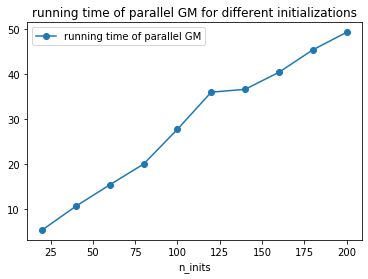

In [51]:
x=np.linspace(20,200,10)
plt.plot(x,store_t_par,'o-')
#plt.plot(x,store_m,'o-')
plt.xlabel('n_inits')
plt.legend(['running time of parallel GM'])
plt.title('running time of parallel GM for different initializations')

Text(0.5, 1.0, 'comparison of running time between serial and parallel GM')

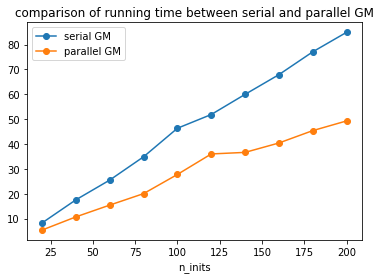

In [15]:
x=np.linspace(20,200,10)
plt.plot(x,store_t,'o-')
plt.plot(x,store_t_par,'o-')

plt.xlabel('n_inits')
plt.legend(['serial GM','parallel GM'])
plt.title('comparison of running time between serial and parallel GM')

In [14]:
#store_t=[8.319382905960083, 17.608941793441772, 25.536614894866943, 34.89030313491821, 46.350131034851074, 51.868088722229004, 59.96548414230347, 67.8835859298706, 77.04912209510803, 84.89184927940369]
store_t_par=[5.449560165405273, 10.742162942886353, 15.474745988845825, 20.080547094345093, 27.78811287879944, 36.01866006851196, 36.644978046417236, 40.41940712928772, 45.38898301124573, 49.28500771522522]
#store_m=[0.013333333333333308, 0.013333333333333308, 0.026666666666666616, 0.0, 0.013333333333333308, 0.020000000000000018, 0.020000000000000018, 0.0, 0.013333333333333308, 0.10666666666666669]
store_m_par=[0.013333333333333308, 0.00666666666666671, 0.00666666666666671, 0.00666666666666671, 0.0, 0.00666666666666671, 0.0, 0.00666666666666671, 0.00666666666666671, 0.0]

Text(0.5, 1.0, 'comparison of match ratio(no seed) between serial and parallel GM')

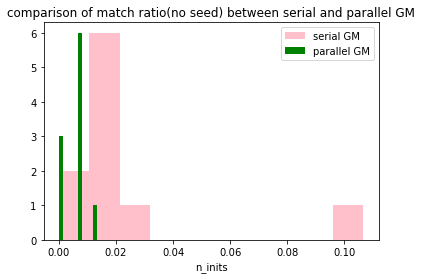

In [17]:
x=np.linspace(20,200,10)
##plt.plot(x,store_m,'o-')#
#plt.plot(x,store_m_par,'o-')
#plt.hist(store_m_par, bins=41,density=1,color='grey')

#plt.hist(store_m, bins=10,density=3,color='pink')
#plt.hist(store_m_par, bins=10,density=3,color='green')
plt.hist(store_m,color='pink')
plt.hist(store_m_par,color='green')

plt.xlabel('n_inits')
plt.legend(['serial GM','parallel GM'])
plt.title('comparison of match ratio(no seed) between serial and parallel GM')

### add seeds

In [18]:
W1 = np.sort(random.sample(list(range(n_verts)),10))
W1 = W1.astype(int)
W2 = np.array(node_unshuffle_input[W1])
node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

In [22]:
seed_t_par=[]
seed_m_par=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = time.time()
    n_init = 30  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    seed_t_par.append(t)
    seed_m_par.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0067, running time is 7.8177
match ratio for seed = 1 is 0.0133, running time is 8.8941
match ratio for seed = 2 is 0.0333, running time is 8.0320
match ratio for seed = 3 is 0.0333, running time is 8.1671
match ratio for seed = 4 is 0.0333, running time is 7.9932
match ratio for seed = 5 is 0.0600, running time is 7.3278
match ratio for seed = 6 is 0.1067, running time is 7.3617
match ratio for seed = 7 is 1.0000, running time is 6.3648
match ratio for seed = 8 is 1.0000, running time is 10.0182
match ratio for seed = 9 is 1.0000, running time is 8.6401


In [23]:
print(seed_t_par)
print(seed_m_par)

[7.81766676902771, 8.894088983535767, 8.031995296478271, 8.167123079299927, 7.993185758590698, 7.327760934829712, 7.361699104309082, 6.364764928817749, 10.018152952194214, 8.640109062194824]
[0.00666666666666671, 0.013333333333333308, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.06000000000000005, 0.10666666666666669, 1.0, 1.0, 1.0]


In [24]:
seed_t_par5=[]
seed_m_par5=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = time.time()
    n_init = 50  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    seed_t_par5.append(t)
    seed_m_par5.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0000, running time is 13.5707
match ratio for seed = 1 is 0.0133, running time is 13.8936
match ratio for seed = 2 is 0.0200, running time is 12.7737
match ratio for seed = 3 is 0.0533, running time is 12.5514
match ratio for seed = 4 is 0.1000, running time is 12.3096
match ratio for seed = 5 is 0.0867, running time is 11.6256
match ratio for seed = 6 is 0.1467, running time is 10.4429
match ratio for seed = 7 is 1.0000, running time is 10.7929
match ratio for seed = 8 is 1.0000, running time is 11.6059
match ratio for seed = 9 is 1.0000, running time is 8.7895


In [25]:
print(seed_t_par5)
print(seed_m_par5)

[13.570723056793213, 13.89364767074585, 12.773712873458862, 12.551423072814941, 12.309580087661743, 11.62556791305542, 10.442891120910645, 10.792894124984741, 11.605890035629272, 8.789473056793213]
[0.0, 0.013333333333333308, 0.020000000000000018, 0.053333333333333344, 0.09999999999999998, 0.08666666666666667, 0.1466666666666666, 1.0, 1.0, 1.0]


In [26]:
seed_t_par11=[]
seed_m_par11=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = time.time()
    n_init = 110  # parameter for GMP
    sgm_par = GraphMatch(n_init=n_init, init_method="rand")
    sgm_par = sgm_par.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm_par.perm_inds_, sgm_par.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm_par.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    seed_t_par11.append(t)
    seed_m_par11.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0067, running time is 28.4552
match ratio for seed = 1 is 0.0133, running time is 28.8483
match ratio for seed = 2 is 0.0400, running time is 26.0437
match ratio for seed = 3 is 0.0533, running time is 27.5318
match ratio for seed = 4 is 0.1133, running time is 26.0624
match ratio for seed = 5 is 0.1400, running time is 26.4265
match ratio for seed = 6 is 0.1333, running time is 24.0276
match ratio for seed = 7 is 1.0000, running time is 20.6588
match ratio for seed = 8 is 1.0000, running time is 19.6267
match ratio for seed = 9 is 1.0000, running time is 19.7014


In [27]:
print(seed_t_par11)
print(seed_m_par11)

[28.45522904396057, 28.848260164260864, 26.043678045272827, 27.531800031661987, 26.062399864196777, 26.426475763320923, 24.027626037597656, 20.65881586074829, 19.62665295600891, 19.701385974884033]
[0.00666666666666671, 0.013333333333333308, 0.040000000000000036, 0.053333333333333344, 0.11333333333333329, 0.14, 0.1333333333333333, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'match ratio of parallel GM with different seeds')

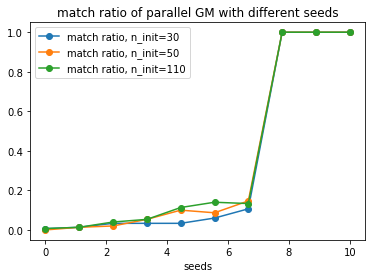

In [29]:
x=np.linspace(0,10,10)
plt.plot(x,seed_m_par,'o-')
plt.plot(x,seed_m_par5,'o-')
plt.plot(x,seed_m_par11,'o-')

plt.xlabel('seeds')
plt.legend(['match ratio, n_init=30','match ratio, n_init=50','match ratio, n_init=110'])
plt.title('match ratio of parallel GM with different seeds')

Text(0.5, 1.0, 'running time of parallel GM with different seeds')

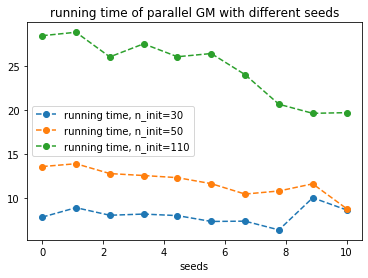

In [30]:
x=np.linspace(0,10,10)

plt.plot(x,seed_t_par,'o--')
plt.plot(x,seed_t_par5,'o--')
plt.plot(x,seed_t_par11,'o--')
plt.xlabel('seeds')
plt.legend(['running time, n_init=30','running time, n_init=50','running time, n_init=110'])
plt.title('running time of parallel GM with different seeds')

### with seed, serial

In [31]:
seed_t_par5s=[]
seed_m_par5s=[]
for i in range(10):
    W1 = np.sort(random.sample(list(range(n_verts)),i))
    W1 = W1.astype(int)
    W2 = np.array(node_unshuffle_input[W1])
    node_unshuffle_input[node_shuffle_input] = np.array(range(n_verts))

    currtime = time.time()
    n_init = 50  # parameter for GMP
    sgm = GMP(n_init=n_init, init_method="rand")
    sgm = sgm.fit(A1, A2_shuffle,W1,W2)

    A2_unshuffle = A2_shuffle[np.ix_(sgm.perm_inds_, sgm.perm_inds_)]
    match_ratio = 1 - (np.count_nonzero(abs(sgm.perm_inds_ - node_unshuffle_input)) / n_verts)

    t=time.time() - currtime
    seed_t_par5s.append(t)
    seed_m_par5s.append(match_ratio)
    print("match ratio for seed = %d is %0.4f, running time is %0.4f"  % (i, match_ratio,t))

match ratio for seed = 0 is 0.0133, running time is 20.8838
match ratio for seed = 1 is 0.1267, running time is 23.1644
match ratio for seed = 2 is 0.0467, running time is 20.5449
match ratio for seed = 3 is 1.0000, running time is 21.7210
match ratio for seed = 4 is 1.0000, running time is 22.9312
match ratio for seed = 5 is 1.0000, running time is 17.8678
match ratio for seed = 6 is 1.0000, running time is 16.4623
match ratio for seed = 7 is 1.0000, running time is 15.8353
match ratio for seed = 8 is 1.0000, running time is 15.6376
match ratio for seed = 9 is 1.0000, running time is 14.9165


In [32]:
print(seed_t_par5s)
print(seed_m_par5s)

[20.88376808166504, 23.164361000061035, 20.544879913330078, 21.72102689743042, 22.931166172027588, 17.867817878723145, 16.462317943572998, 15.835272312164307, 15.637641906738281, 14.916513204574585]
[0.013333333333333308, 0.1266666666666667, 0.046666666666666634, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'running time of serial and parallel GM when n_init=50')

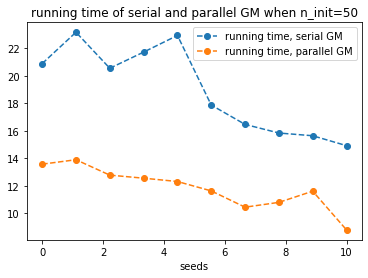

In [37]:
x=np.linspace(0,10,10)

plt.plot(x,seed_t_par5s,'o--')
plt.plot(x,seed_t_par5,'o--')
#plt.plot(x,seed_t_par11,'o--')
plt.xlabel('seeds')
plt.legend(['running time, serial GM','running time, parallel GM'])
plt.title('running time of serial and parallel GM when n_init=50')

Text(0.5, 1.0, 'match raito of serial and parallel GM when n_init=50')

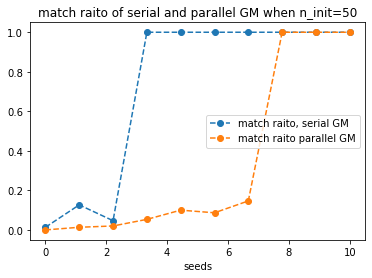

In [38]:
x=np.linspace(0,10,10)

plt.plot(x,seed_m_par5s,'o--')
plt.plot(x,seed_m_par5,'o--')
#plt.plot(x,seed_t_par11,'o--')
plt.xlabel('seeds')
plt.legend(['match raito, serial GM','match raito parallel GM'])
plt.title('match raito of serial and parallel GM when n_init=50')